# Logisitc Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

from sklearn import linear_model

In [ ]:
# Training Data Set
(x, t) = mglearn.datasets.make_forge()

print(x)
print(t)

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


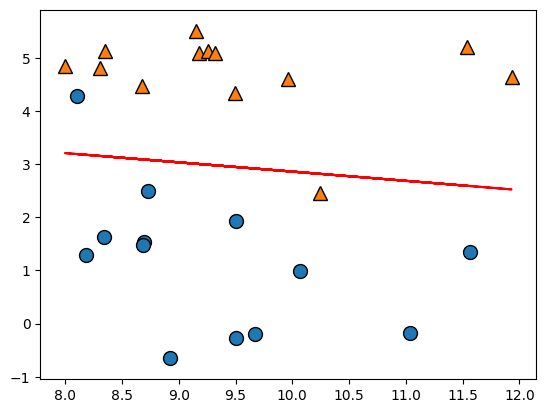

In [ ]:
# 2차원 평면에 표현
# x 안에 있는 2개의 값을 각각 x축의 값, y축의 값으로 이용
# 각 데이터의 target 값을 0과 1에 따라 다르게 표현
mglearn.discrete_scatter(x[:, 0], x[:, 1], t)

# 이 데이터에 대한 Linear Regression Model을 구현
model = linear_model.LinearRegression()
model.fit(x[:,0].reshape(-1, 1),
          x[:,1].reshape(-1, 1))

# W와 b값
plt.plot(x[:,0], x[:,0]*model.coef_.ravel() + model.intercept_, color='r')
plt.plot(x[:,1], x[:,1]*model.coef_.ravel() + model.intercept_, color='b')
plt.show()

[[0.63265306]]


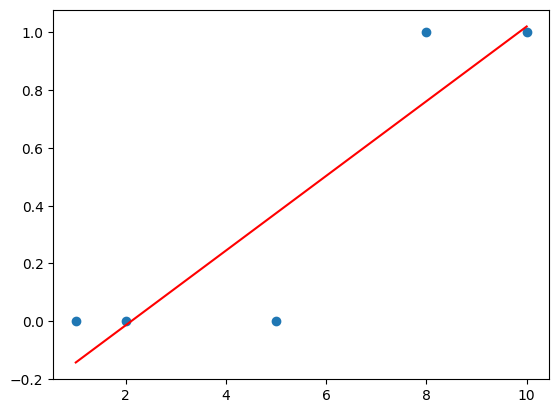

In [ ]:
# Training Data Set
x_data = np.array([1, 2, 5, 8, 10])
t_data = np.array([0, 0, 0, 1, 1])

# simple linear regression
model = linear_model.LinearRegression()
model.fit(x_data.reshape(-1, 1), t_data.reshape(-1, 1))

print(model.predict(np.array([[7]])))  # [[0.63265306]]

plt.scatter(x_data, t_data)
plt.plot(x_data, x_data * model.coef_.ravel() + model.intercept_, color='r')
plt.show()

[[0.41831972]]


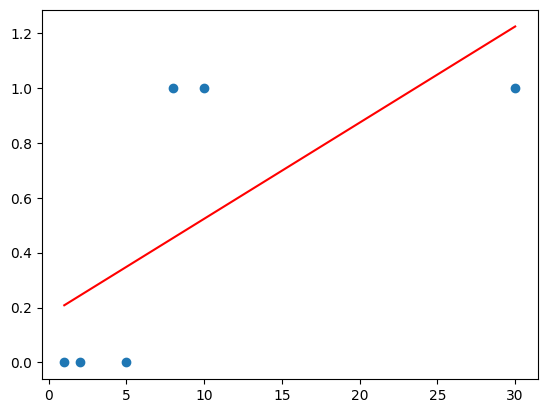

In [ ]:
# Training Data Set
x_data = np.array([1, 2, 5, 8, 10, 30])
t_data = np.array([0, 0, 0, 1, 1, 1])

# simple linear regression
model = linear_model.LinearRegression()
model.fit(x_data.reshape(-1, 1), t_data.reshape(-1, 1))

print(model.predict(np.array([[7]])))  # [[0.41831972]]

plt.scatter(x_data, t_data)
plt.plot(x_data, x_data * model.coef_.ravel() + model.intercept_, color='r')
plt.show()

### sklearn 구현

In [ ]:
import numpy as np
from sklearn import linear_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Training Data Set
# 공부 시간에 따른 시험 합격 여부
x_data = np.arange(2, 21, 2).reshape(-1, 1)
t_data = np.array([0,0,0,0,0,0,1,1,1,1]).reshape(-1, 1)

# sklearn 구현
sklearn_model = linear_model.LogisticRegression()
sklearn_model.fit(x_data, t_data.ravel())

study_hour = np.array([[13]])

result = sklearn_model.predict(study_hour)
print(result)  # [0] 불합격

# 확률값을 알고 싶다면
result_proba = sklearn_model.predict_proba(study_hour)
print(result_proba)  # [[0.50009391 0.49990609]]

[0]
[[0.50009391 0.49990609]]


### Tensorflow keras 구현

In [ ]:
keras_model = Sequential()

keras_model.add(Flatten(input_shape=(1,)))
keras_model.add(Dense(units=1, activation="sigmoid"))

keras_model.compile(optimizer=SGD(learning_rate=1e-2), loss="binary_crossentropy")

keras_model.fit(x_data, t_data, epochs=500, verbose=0)

study_hour = np.array([[13]])

keras_result = keras_model.predict(study_hour)
print(keras_result)  # [[0.6004171]]

1/1 [==============================] - 0s 120ms/step
[[0.6004171]]
